In [2]:
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
from pandas import DataFrame 

In [3]:
# Requesting  Siw Initial Water Saturation  and Sor Residual Oil Saturation input
Siw_str = input('Enter the initial water saturation')  #default=.363
Sor_str = input('Enter the residual oil saturation')   #default=.205

# Converting to Float
Siw = float(Siw_str)
Sor = float(Sor_str)

Enter the initial water saturation.363
Enter the residual oil saturation.205


In [14]:
# requesting input for No of Sw's for fw v/s Sw plot, the Sw grid resolution
no_of_sats_str = input("Enter the number of saturations you want to plot")  #default =10000 for higher accuracy

#convert to integer
no_of_sats = int(no_of_sats_str)



Enter the number of saturations you want to plot10000


In [5]:
#initializaing Swd array 
Swd = np.empty([no_of_sats])

#initializaing Sw array 
Sw = np.empty([no_of_sats])

#Initializing kro
kro = np.empty([no_of_sats])

#Initializing krw
krw = np.empty([no_of_sats])

#Initializing krw
fw = np.empty([no_of_sats])



In [6]:
# requesting input for alphas   
alpha_1_str = input("Please enter the alpha 1") #default 1.0
alpha_2_str = input("Please enter the alpha 2") #deafult .78

# Converting to float
alpha_1 = float(alpha_1_str)
alpha_2 = float(alpha_2_str)



Please enter the alpha 11
Please enter the alpha 2.78


In [7]:
# requesting input for alphas
m_str = input("Please enter the m") #default=2.56
n_str = input("Please enter the n") #deafult= 3.72

# Converting to float
m = float(m_str)
n = float(n_str)




Please enter the m2.56
Please enter the n3.78


In [8]:
# requesting input for oil and water viscoity
mu_oil_str = input("Please enter the viscosity of oil")  #default 2
mu_water_str = input("Please enter the viscosity of water") #default 1

# Converting to Float
mu_oil = float(mu_oil_str)
mu_water = float(mu_water_str)


Please enter the viscosity of oil2
Please enter the viscosity of water1


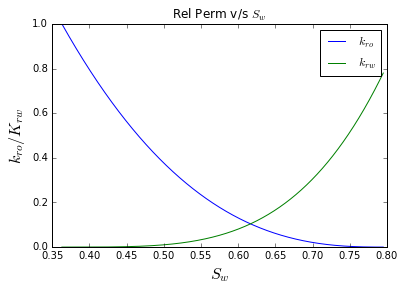

In [9]:

#Calculating fw and Sw array
for i in range(no_of_sats):
    Sw[0] = Siw    # Setting Siw as initial value of Sw
    increment_Sw = (1-Siw-Sor)/no_of_sats #Increment in Sw for plot
    Swd[i] = (Sw[i]-Siw)/(1-Sor-Siw)   # equation 3.111
    kro[i] = alpha_1*(1-Swd[i])**m   # equation 3.109 
    krw[i] = alpha_2*Swd[i]**n # equation 3.110
    fw[i]= 1/( 1 + (kro[i]*mu_water)/(krw[i]*mu_oil)) 
    if i < no_of_sats - 1 :
        Sw[i+1] = Sw[i] + increment_Sw

        
        
plt.plot(Sw,kro, label='$k_{ro}$')
plt_krw = plt.plot(Sw,krw,label='$k_{rw}$')
plt.ylabel('$k_{ro}/K_{rw}$',fontsize = 16)
plt.xlabel('$S_w$',fontsize = 16)
plt.title('Rel Perm v/s $S_w$')
plt.legend()

       

The water front saturations is =  0.664968
The slope of tangent line is = 2.97062816158


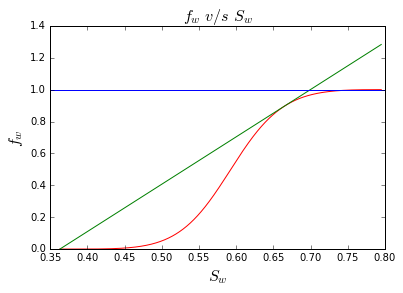

In [15]:


# Generate a plot of fw v/s Sw
fw_versus_Sw = plt.plot(Sw,fw,'r')
plt.xlabel('$S_w$',fontsize = 16)
plt.ylabel('$f_w$',fontsize = 16)
plt.title('$f_w$ $v/s$ $S_w$',fontsize = 16)

# calculating f'w
fw_dash = np.diff(fw)/np.diff(Sw)
b=[0]
fw_dash = np.concatenate((fw_dash,b))

#initalizing slope of line array
slope_of_line = np.empty([no_of_sats])
len(slope_of_line)

#initializing y coordinate of line
y=np.empty([no_of_sats])

# calculating slope of line 
for i in range(no_of_sats):
    slope_of_line[i] = (fw[i]-fw[0])/(Sw[i]-Sw[0])

# criteria for matching the slope    
for i in range(len(fw_dash)-1,0,-1):
    if((slope_of_line[i] - fw_dash[i]) <= .0001):
        Swf = Sw[i]
        no_of_Swf = i
        print('The water front saturations is = ',Swf)
        m_line = slope_of_line[i]
        print('The slope of tangent line is =', slope_of_line[i])
        break
        
#calculating Sw_bar from interesction of tangent to fw and y=1
for i in range(no_of_sats):
    y[i] = m_line*Sw[i] - Siw*m_line

Sw_bar= (1 + (Siw*m_line))/m_line
Sw_bar

plt.plot(Sw,y,'g')
plt.axhline(y=1,)

In [16]:
#initializing Apparent Viscosity Array
vis_ap =np.empty(no_of_sats)

In [17]:
#apparent viscosity for Sw<Swf
vis_ap_ro = 1/((kro[0]/mu_oil))
print(vis_ap_ro)

#apparent viscosity for 1-Sor>Sw>Swf    
for i in range(no_of_Swf,no_of_sats):
    vis_ap[i] = 1/((kro[i]/mu_oil) + (krw[i]/mu_water))


2.0


In [18]:
# apparent viscosity calcualtion for breakthrough Swf using trapezoidal method
# -ve sign is to compensate for limits of intergration from  f'sw2(swf in this case for breakthrough) to zero instead of zero to
# f'sw2
-np.trapz(vis_ap[no_of_Swf:],fw_dash[no_of_Swf:])/fw_dash[no_of_Swf]


#use this to calculate q@breakthrough from equation 3.125

3.2908073336269421

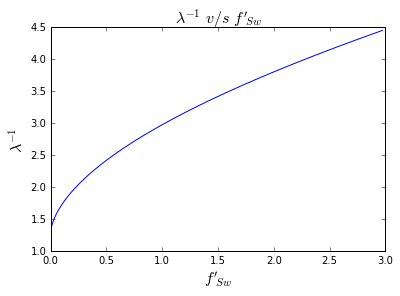

In [19]:
plt.plot(fw_dash[no_of_Swf:],vis_ap[no_of_Swf:])
plt.xlabel("$f'_{Sw}$",fontsize=16)
plt.ylabel(r"$\lambda$$^{-1}$",fontsize=16)
plt.title(r"$\lambda$$^{-1}$ $v/s$ $f'_{Sw}$" ,fontsize=16)


In [20]:
#initializing Q_inj, Apparent Viscoisty and Sw2 Arrays
Q_inj=np.empty(no_of_sats)
apvis=np.empty(no_of_sats)
Sw2=np.empty(no_of_sats)



In [21]:
#calculating apvis for various all Sw>Swf
for i in range(no_of_Swf+1,no_of_sats):
    Sw2[i]=Sw[i]
    Q_inj[i]=1/fw_dash[i]
    apvis[i]=-np.trapz(vis_ap[i:],fw_dash[i:])/fw_dash[i]

In [22]:
#creating a dataframe of f'sw , apvis, Sw2, Q_inj
d = {"f'sw":fw_dash[no_of_Swf+1:], 'Apvis':apvis[no_of_Swf+1:],'Q_inj': Q_inj[no_of_Swf+1:]}
df = pd.DataFrame(data=d,index = Sw2[no_of_Swf+1:])
df.index.name = 'Sw2'

In [43]:
#increasing display of maximum no of rows displayed in Dataframe
pd.set_option('display.max_rows', 2000)
df

,Avis,Q_inj,f'sw
Sw2,,,
0.663888,3.264068,3.361908e-01,2.974501
0.663931,3.262985,3.365086e-01,2.971692
0.663974,3.261903,3.368268e-01,2.968885
0.664018,3.260820,3.371455e-01,2.966078
0.664061,3.259738,3.374646e-01,2.963274
0.664104,3.258656,3.377841e-01,2.960470
0.664147,3.257574,3.381041e-01,2.957669
0.664190,3.256492,3.384245e-01,2.954869
0.664234,3.255411,3.387454e-01,2.952070


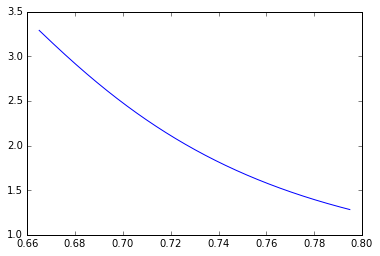

In [23]:
#just a check
plt.plot(Sw2[no_of_Swf+1:],apvis[no_of_Swf+1:])